In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from ast import literal_eval
import sklearn as sk
import seaborn as sb
import re 
from tqdm import tqdm

import torch
#import torchvision

In [2]:
def initialize_data():
    data = pd.read_csv("data/df_text_spacy.csv")
    data2 = pd.read_csv("data/train_500.csv")
    data2 = data2[["gender", "age", "topic", "sign"]]
    data = data.join(data2)
    data = data.drop(["Unnamed: 0"], axis=1)
    data = data.replace({"male": 0, "female": 1})

    data['sent_tokenize'] = data.apply(lambda row: sent_tokenize(row['text']), axis=1)
    data['word_tokenize'] = data.apply(lambda row: word_tokenize(row['text']), axis=1)
    data['sentence_count'] = data.apply(lambda row: len(row['sent_tokenize']), axis=1)
    data['word_count'] = data.apply(lambda row: len(literal_eval(row['text_list'])), axis=1)

    return data

In [3]:
data = initialize_data()

In [4]:
data["sign"].value_counts()

Cancer         1875
Scorpio        1795
Aries          1790
Pisces         1764
Virgo          1709
Taurus         1679
Libra          1645
Leo            1516
Gemini         1502
Sagittarius    1470
Aquarius       1450
Capricorn      1305
Name: sign, dtype: int64

In [5]:
#data = data.replace({"Cancer": 0, "Scorpio": 1, "Aries": 2, "Pisces": 3, "Virgo": 4, "Taurus": 5, "Libra": 6, "Leo": 7, "Gemini": 8, "Sagittarius": 9, "Aquarius": 10, "Capricorn": 11})

In [6]:
unique_signs = data.sign.unique()
df_dict = {elem : pd.DataFrame() for elem in unique_signs}

for key in df_dict.keys():
    df_dict[key] = data[:][data.sign == key]

In [7]:
df_dict["Cancer"].describe()

,lemma_list_num_of_stopwords,gender,age,sentence_count,word_count
count,1875.000000,1875.000000,1875.000000,1875.000000,1875.000000
mean,62.572800,0.381333,25.402667,8.534933,170.009067
std,61.661116,0.485844,6.204320,7.863919,158.376763
min,0.000000,0.000000,14.000000,1.000000,2.000000
25%,14.000000,0.000000,23.000000,2.000000,43.000000
50%,43.000000,0.000000,25.000000,6.000000,122.000000
75%,92.000000,1.000000,26.000000,12.000000,247.500000
max,312.000000,1.000000,46.000000,33.000000,777.000000


In [8]:
df_dict["Scorpio"].describe()

,lemma_list_num_of_stopwords,gender,age,sentence_count,word_count
count,1795.000000,1795.000000,1795.000000,1795.000000,1795.000000
mean,63.417270,0.383844,26.432869,8.300279,174.327577
std,58.366211,0.486456,8.495873,7.599109,154.930263
min,0.000000,0.000000,13.000000,1.000000,4.000000
25%,18.000000,0.000000,23.000000,2.000000,52.000000
50%,46.000000,0.000000,25.000000,6.000000,129.000000
75%,93.000000,1.000000,33.000000,12.000000,250.500000
max,282.000000,1.000000,48.000000,33.000000,708.000000


In [9]:
df_dict["Aries"].describe()

,lemma_list_num_of_stopwords,gender,age,sentence_count,word_count
count,1790.000000,1790.000000,1790.000000,1790.000000,1790.000000
mean,61.796648,0.436872,26.781006,8.221229,170.217877
std,59.023780,0.496137,7.537503,7.812303,155.924687
min,0.000000,0.000000,13.000000,1.000000,1.000000
25%,14.000000,0.000000,23.000000,2.000000,44.000000
50%,42.000000,0.000000,25.000000,5.000000,116.500000
75%,92.000000,1.000000,35.000000,12.000000,252.000000
max,297.000000,1.000000,48.000000,33.000000,745.000000


In [10]:
df_dict["Pisces"].describe()

,lemma_list_num_of_stopwords,gender,age,sentence_count,word_count
count,1764.000000,1764.000000,1764.000000,1764.000000,1764.000000
mean,57.804989,0.438776,28.368481,7.721088,161.069728
std,57.976372,0.496378,7.851229,7.522203,153.946953
min,0.000000,0.000000,13.000000,1.000000,3.000000
25%,12.000000,0.000000,24.000000,2.000000,39.000000
50%,37.000000,0.000000,26.000000,5.000000,106.500000
75%,88.000000,1.000000,36.000000,11.000000,240.000000
max,286.000000,1.000000,48.000000,33.000000,696.000000


In [11]:
df_dict["Virgo"].describe()

,lemma_list_num_of_stopwords,gender,age,sentence_count,word_count
count,1709.000000,1709.000000,1709.000000,1709.000000,1709.000000
mean,65.440609,0.441779,26.320655,8.823874,180.334114
std,58.749474,0.496744,7.827707,7.737193,154.498922
min,0.000000,0.000000,13.000000,1.000000,3.000000
25%,18.000000,0.000000,23.000000,2.000000,55.000000
50%,50.000000,0.000000,25.000000,6.000000,142.000000
75%,95.000000,1.000000,33.000000,13.000000,261.000000
max,296.000000,1.000000,48.000000,33.000000,687.000000


In [12]:
df_dict["Taurus"].describe()

,lemma_list_num_of_stopwords,gender,age,sentence_count,word_count
count,1679.000000,1679.000000,1679.000000,1679.000000,1679.000000
mean,61.103038,0.456224,25.251936,8.162001,167.927933
std,58.426340,0.498228,5.950653,7.435697,154.397175
min,0.000000,0.000000,13.000000,1.000000,3.000000
25%,14.000000,0.000000,23.000000,2.000000,41.000000
50%,44.000000,0.000000,25.000000,6.000000,128.000000
75%,89.500000,1.000000,26.000000,12.000000,243.000000
max,294.000000,1.000000,48.000000,33.000000,705.000000


In [13]:
df_dict["Libra"].describe()

,lemma_list_num_of_stopwords,gender,age,sentence_count,word_count
count,1645.000000,1645.000000,1645.000000,1645.000000,1645.000000
mean,56.574468,0.449240,25.454103,7.838298,155.188450
std,54.750385,0.497568,6.480637,7.171898,142.980678
min,0.000000,0.000000,13.000000,1.000000,3.000000
25%,15.000000,0.000000,23.000000,2.000000,43.000000
50%,39.000000,0.000000,25.000000,6.000000,110.000000
75%,84.000000,1.000000,26.000000,11.000000,229.000000
max,319.000000,1.000000,48.000000,33.000000,705.000000


In [14]:
df_dict["Leo"].describe()

,lemma_list_num_of_stopwords,gender,age,sentence_count,word_count
count,1516.000000,1516.000000,1516.000000,1516.000000,1516.000000
mean,68.996702,0.478892,26.870712,8.843008,186.819261
std,62.142182,0.499719,7.693496,7.871519,161.073881
min,0.000000,0.000000,13.000000,1.000000,3.000000
25%,18.000000,0.000000,23.000000,2.000000,54.000000
50%,51.000000,0.000000,25.000000,6.000000,142.000000
75%,104.250000,1.000000,34.000000,13.000000,287.250000
max,303.000000,1.000000,48.000000,33.000000,720.000000


In [15]:
df_dict["Gemini"].describe()

,lemma_list_num_of_stopwords,gender,age,sentence_count,word_count
count,1502.000000,1502.000000,1502.000000,1502.000000,1502.000000
mean,69.750333,0.438748,27.147803,8.964048,191.454727
std,60.692360,0.496399,7.661179,7.668344,159.104184
min,0.000000,0.000000,13.000000,1.000000,3.000000
25%,22.000000,0.000000,24.000000,3.000000,65.250000
50%,52.000000,0.000000,25.000000,7.000000,147.000000
75%,102.750000,1.000000,33.000000,13.000000,283.000000
max,306.000000,1.000000,48.000000,33.000000,726.000000


In [16]:
df_dict["Sagittarius"].describe()

,lemma_list_num_of_stopwords,gender,age,sentence_count,word_count
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,63.546939,0.529252,26.915646,7.948980,176.770068
std,59.365663,0.499313,9.159488,7.683546,157.945588
min,0.000000,0.000000,13.000000,1.000000,3.000000
25%,16.000000,0.000000,23.000000,2.000000,48.000000
50%,45.000000,1.000000,25.000000,5.000000,133.000000
75%,95.000000,1.000000,33.000000,12.000000,257.000000
max,299.000000,1.000000,48.000000,33.000000,719.000000


In [17]:
df_dict["Aquarius"].describe()

,lemma_list_num_of_stopwords,gender,age,sentence_count,word_count
count,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000
mean,64.750345,0.368966,26.153793,8.726207,176.575172
std,60.083285,0.482691,7.638336,7.729569,155.715642
min,0.000000,0.000000,13.000000,1.000000,3.000000
25%,15.000000,0.000000,23.000000,2.000000,47.000000
50%,46.000000,0.000000,25.000000,6.000000,129.000000
75%,100.000000,1.000000,27.000000,13.000000,271.750000
max,295.000000,1.000000,48.000000,33.000000,695.000000


In [18]:
df_dict["Capricorn"].describe()

,lemma_list_num_of_stopwords,gender,age,sentence_count,word_count
count,1305.000000,1305.000000,1305.000000,1305.000000,1305.000000
mean,66.422989,0.444444,26.978544,9.014559,183.083525
std,61.595756,0.497094,7.761761,7.946366,162.706221
min,0.000000,0.000000,13.000000,1.000000,3.000000
25%,15.000000,0.000000,23.000000,2.000000,49.000000
50%,49.000000,0.000000,25.000000,7.000000,138.000000
75%,101.000000,1.000000,33.000000,13.000000,275.000000
max,303.000000,1.000000,48.000000,33.000000,698.000000


In [19]:
def create_word_dict(data, without_stopwords=True, with_stopwords=False):

    if without_stopwords:
        word_dict_without_stopwords = {}
        
    if with_stopwords:
        word_dict_with_stopwords = {}

    stopword_list = stopwords.words('english')
    for i in tqdm(range(len(data))):
        if without_stopwords:
            for word in literal_eval(data["lemma_list"][i]):
                if word not in [",", ".", ")", "(", "{", "}", "[", "]", ":", ";", "\"\"", "...", "I", "-PRON-", "-", "'", "'s", "urllink"] and word not in stopword_list:
                    if word in word_dict_without_stopwords.keys():
                        word_dict_without_stopwords[word] += 1
                    else:
                        word_dict_without_stopwords[word] = 1

        if with_stopwords:
            for word in literal_eval(data["word_tokenize"][i]):
                if word not in [",", ".", ")", "(", "{", "}", "[", "]", ":", ";", "\"\"", "...", "I", "-PRON-", "-", "'"]:
                    if word in word_dict_with_stopwords.keys():
                        word_dict_with_stopwords[word] += 1
                    else:
                        word_dict_with_stopwords[word] = 1

    if without_stopwords and with_stopwords:
        return word_dict_without_stopwords, word_dict_with_stopwords
    elif without_stopwords:
        return word_dict_without_stopwords
    elif with_stopwords:
        return word_dict_with_stopwords
    else:
        print("Nothing to return selected")
        return 0

In [20]:
#words_without_stopwords_all = create_word_dict(data, True, False)

words_without_stopwords_cancer = create_word_dict(df_dict["Cancer"].reset_index(), True, False)
words_without_stopwords_scorpio = create_word_dict(df_dict["Scorpio"].reset_index(), True, False)
words_without_stopwords_aries = create_word_dict(df_dict["Aries"].reset_index(), True, False)
words_without_stopwords_pisces = create_word_dict(df_dict["Pisces"].reset_index(), True, False)
words_without_stopwords_virgo = create_word_dict(df_dict["Virgo"].reset_index(), True, False)
words_without_stopwords_taurus = create_word_dict(df_dict["Taurus"].reset_index(), True, False)
words_without_stopwords_libra = create_word_dict(df_dict["Libra"].reset_index(), True, False)
words_without_stopwords_leo = create_word_dict(df_dict["Leo"].reset_index(), True, False)
words_without_stopwords_gemini = create_word_dict(df_dict["Gemini"].reset_index(), True, False)
words_without_stopwords_sagittarius = create_word_dict(df_dict["Sagittarius"].reset_index(), True, False)
words_without_stopwords_aquarius = create_word_dict(df_dict["Aquarius"].reset_index(), True, False)
words_without_stopwords_capricorn = create_word_dict(df_dict["Capricorn"].reset_index(), True, False)
#words_without_stopwords_female = create_word_dict(data_female, True, False)

100%|██████████| 1305/1305 [00:00<00:00, 2158.54it/s]


In [21]:
def visualize_specific_words(dictionary, limit=10, save_fig=True, save_name="standard_save_name"):
    data_as_df = pd.DataFrame(data={"word": dictionary.keys(), "number": dictionary.values()})
    sorted_df = data_as_df.sort_values(by="number", ascending=False)

    figure = sb.barplot(data=sorted_df[:limit], x="word", y="number", palette="deep")
    figure.set_xlabel("Words")
    figure.set_ylabel("Appearances of the word")

    if save_fig:
        fig = figure.get_figure()
        fig.savefig("images/sternzeichen/" + str(save_name + ".jpg"))

    return fig.get_figure()

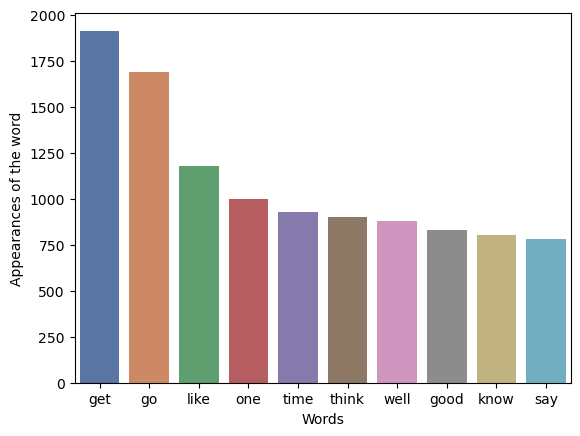

In [22]:
cancer_words = visualize_specific_words(words_without_stopwords_cancer, save_fig=True, save_name="cancer_words")
scorpio_words = visualize_specific_words(words_without_stopwords_scorpio, save_fig=True, save_name="scorpio_words")
aries_words = visualize_specific_words(words_without_stopwords_aries, save_fig=True, save_name="aries_words")
pisces_words = visualize_specific_words(words_without_stopwords_pisces, save_fig=True, save_name="pisces_words")
virgo_words = visualize_specific_words(words_without_stopwords_virgo, save_fig=True, save_name="virgo_words")
taurus_words = visualize_specific_words(words_without_stopwords_taurus, save_fig=True, save_name="taurus_words")
libra_words = visualize_specific_words(words_without_stopwords_libra, save_fig=True, save_name="libra_words")
leo_words = visualize_specific_words(words_without_stopwords_leo, save_fig=True, save_name="leo_words")
gemini_words = visualize_specific_words(words_without_stopwords_gemini, save_fig=True, save_name="gemini_words")
sagittarius_words = visualize_specific_words(words_without_stopwords_sagittarius, save_fig=True, save_name="sagittarius_words")
aquarius_words = visualize_specific_words(words_without_stopwords_aquarius, save_fig=True, save_name="aquarius_words")
capricorn_words = visualize_specific_words(words_without_stopwords_capricorn, save_fig=True, save_name="capricorn_words")

In [23]:
def getNumbers(data):
    data["num_nouns"] = 0
    data["num_verbs"] = 0
    data["num_conjs"] = 0
    num_nouns, num_verbs, num_conjs = [], [], []

    for i in tqdm(range(len(data))):
        nouns, verbs, conjs = 0, 0, 0
        for elem in literal_eval(data["pos_list"][i]):
            #print(elem)
            if elem == "NOUN":
                nouns += 1
            elif elem == "VERB":
                verbs += 1
            elif elem == "CCONJ":
                conjs += 1
        num_nouns.append(nouns)
        num_verbs.append(verbs)
        num_conjs.append(conjs)

    data["num_nouns"] = num_nouns
    data["num_verbs"] = num_verbs
    data["num_conjs"] = num_conjs

    return data

def getRatios(data):
    data["ratio_nouns"] = data.apply(lambda row: (row["num_nouns"] / row["word_count"]), axis=1)
    data["ratio_verbs"] = data.apply(lambda row: (row["num_verbs"] / row["word_count"]), axis=1)
    data["ratio_conjs"] = data.apply(lambda row: (row["num_conjs"] / row["word_count"]), axis=1)

    return data

In [24]:
#data['word_tokenize'] = data.apply(lambda row: word_tokenize(row['text']), axis=1)
data = getNumbers(data)
data = getRatios(data)


100%|██████████| 19500/19500 [00:04<00:00, 4369.76it/s]


In [25]:
data = data.replace({"Cancer": 0, "Scorpio": 1, "Aries": 2, "Pisces": 3, "Virgo": 4, "Taurus": 5, "Libra": 6, "Leo": 7, "Gemini": 8, "Sagittarius": 9, "Aquarius": 10, "Capricorn": 11})

In [26]:
data.head(2)

,text,text_list,lemma_list,pos_list,tag_list,dep_list,shape_list,alpha_list,stop_list,lemma_list_num_of_stopwords,...,sent_tokenize,word_tokenize,sentence_count,word_count,num_nouns,num_verbs,num_conjs,ratio_nouns,ratio_verbs,ratio_conjs
0,This blog is being posted due to the fact that...,"['This', 'blog', 'is', 'being', 'posted', 'due...","['this', 'blog', 'be', 'be', 'post', 'due', 't...","['DET', 'NOUN', 'AUX', 'AUX', 'VERB', 'ADP', '...","['DT', 'NN', 'VBZ', 'VBG', 'VBN', 'IN', 'IN', ...","['det', 'nsubjpass', 'aux', 'auxpass', 'ROOT',...","['Xxxx', 'xxxx', 'xx', 'xxxx', 'xxxx', 'xxx', ...","[True, True, True, True, True, True, True, Tru...","[True, False, True, True, False, True, True, T...",34,...,[This blog is being posted due to the fact tha...,"[This, blog, is, being, posted, due, to, the, ...",4,91,17,15,1,0.186813,0.164835,0.010989
1,So I have a big fucking interview tomorrow for...,"['So', 'I', 'have', 'a', 'big', 'fucking', 'in...","['so', '-PRON-', 'have', 'a', 'big', 'fucking'...","['CCONJ', 'PRON', 'AUX', 'DET', 'ADJ', 'ADJ', ...","['CC', 'PRP', 'VBP', 'DT', 'JJ', 'JJ', 'NN', '...","['advmod', 'nsubj', 'ROOT', 'det', 'amod', 'am...","['Xx', 'X', 'xxxx', 'x', 'xxx', 'xxxx', 'xxxx'...","[True, True, True, True, True, True, True, Tru...","[True, True, True, True, False, False, False, ...",32,...,[So I have a big fucking interview tomorrow fo...,"[So, I, have, a, big, fucking, interview, tomo...",5,88,12,13,2,0.136364,0.147727,0.022727


C:\Users\nikla\AppData\Local\Temp\ipykernel_380\1958704461.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sb.heatmap(data.corr())


<function matplotlib.pyplot.show(close=None, block=None)>

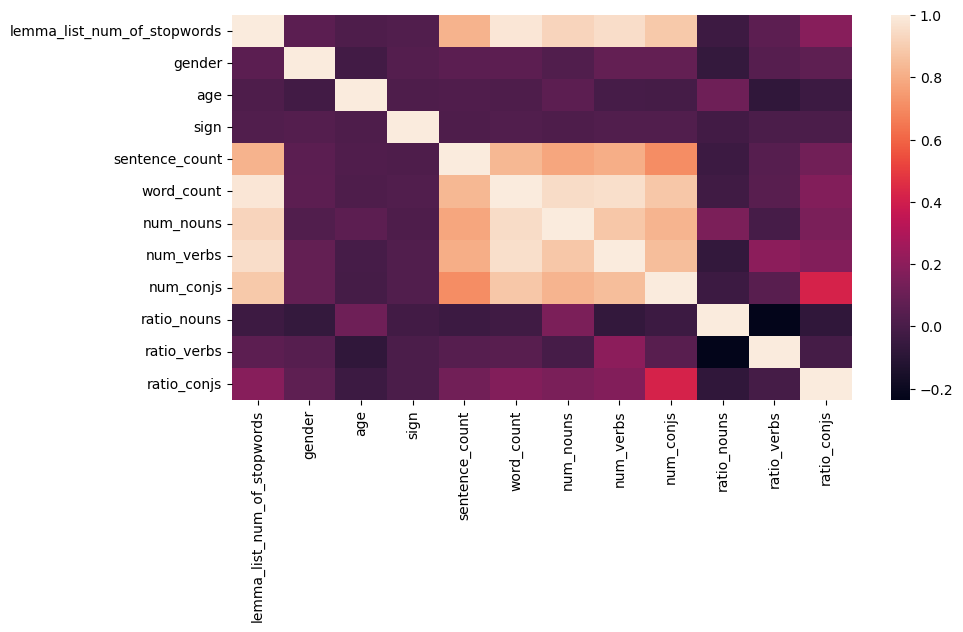

In [27]:
plt.figure(figsize=(10,5))
sb.heatmap(data.corr())
plt.show

In [28]:
from transformers import AutoTokenizer, pipeline

In [29]:
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

def tokenizer_function(input_string, padding=True, truncation=True, return_tensors="pt"):
    return tokenizer(input_string, padding=padding, truncation=truncation, return_tensors=return_tensors)

In [30]:
data["tok"] = 0
for i in tqdm(range(len(data))):
    data["tok"][i] = tokenizer_function(data["text"][i])


  0%|          | 0/19500 [00:00<?, ?it/s]C:\Users\nikla\AppData\Local\Temp\ipykernel_380\2452050011.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["tok"][i] = tokenizer_function(data["text"][i])
100%|██████████| 19500/19500 [00:08<00:00, 2275.58it/s]


In [31]:
data["tok"][1]["input_ids"]

tensor([[  101,  2061,  1045,  2031,  1037,  2502,  8239,  4357,  4826,  2005,
          2026,  2047,  2082,  1012,  1045,  2572,  2036,  6015,  1997,  3331,
          2000,  2111,  2008,  1045,  2123,  1005,  1056,  2113,  2164,  3057,
          1012,  2061,  2008,  1005,  1055,  2183,  2000,  2404,  2033,  1999,
          1037,  2919,  3962,  1012,  1998,  1045,  4687,  2054,  3980,  2008,
          2027,  1005,  2222,  3198,  1012,  2009,  1005,  1055,  2763,  2242,
          2066,  1024,  1011,  2339,  2106,  2017,  6611,  2000, 12997,  7898,
          1011,  2013,  2115,  2034,  3193,  2054, 19802, 22139,  2015, 12997,
          7898,  2013,  2151,  2060,  2082,  1011,  2097,  2017,  2022,  2478,
          1996, 20116,  2226, 13433, 21781,  3075,  2411,  2151,  2393,  2065,
          2017,  2064,   102]])

In [32]:
small_train_dataset = data[data.index <= (len(data)*0.75)]
small_test_dataset = data[data.index > (len(data)*0.75)]

small_train_dataset = small_train_dataset.rename(columns={"sign": "labels", "tok": "logits"})
small_test_dataset = small_test_dataset.rename(columns={"sign": "labels", "tok": "logits"})

In [33]:
small_train_dataset = small_train_dataset[["labels", "logits"]].to_dict()
small_test_dataset = small_test_dataset[["labels", "logits"]].to_dict()

In [34]:
from transformers import AutoModelForSequenceClassification, TrainingArguments, Trainer
import evaluate
from torch import nn

In [35]:
model = AutoModelForSequenceClassification.from_pretrained("bert-base-cased", num_labels = 2)

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at b

In [36]:
training_args = TrainingArguments(output_dir="test_trainer", evaluation_strategy="epoch")
metric = evaluate.load("accuracy")

In [37]:
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=1)
    return metric.compute(predictions=predictions, references=labels)

In [38]:
class CustomTrainer(Trainer):
    def compute_loss(self, model, inputs, return_outputs=False):
        labels = inputs.get("labels")
        # forward pass
        outputs = model(**inputs)
        logits = outputs.get("logits")
        # compute custom loss (suppose one has 3 labels with different weights)
        loss_fct = nn.CrossEntropyLoss(weight=torch.tensor([1.0, 2.0, 3.0]))
        loss = loss_fct(logits.view(-1, self.model.config.num_labels), labels.view(-1))
        return (loss, outputs) if return_outputs else loss

In [39]:
trainer = CustomTrainer(
    model = model,
    args = training_args,
    train_dataset = small_train_dataset,
    eval_dataset = small_test_dataset,
    compute_metrics = compute_metrics,
)

In [86]:
trainer.train()

c:\Users\nikla\anaconda3\envs\NLP-New\lib\site-packages\transformers\optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
***** Running training *****
  Num examples = 2
  Num Epochs = 3
  Instantaneous batch size per device = 8
  Total train batch size (w. parallel, distributed & accumulation) = 8
  Gradient Accumulation steps = 1
  Total optimization steps = 3
  Number of trainable parameters = 108311810
Automatic Weights & Biases logging enabled, to disable set os.environ["WANDB_DISABLED"] = "true"


AttributeError: module 'wandb' has no attribute 'run'